# Artificial Neural Networks

In [1]:
import numpy as np
import tensorflow as tf
from IPython.display import display
from sklearn.datasets import load_diabetes, load_iris
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

With diabetes dataset in sklearn (regression problem).

In [2]:
diabetes_dataset = load_diabetes(as_frame=True)
diabetes_df = diabetes_dataset.frame

In [3]:
print(diabetes_df.info())
display(diabetes_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [4]:
X = diabetes_dataset.data
y = diabetes_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
print(X.shape, y.shape)

(442, 10) (442,)


In [6]:
# build the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation= 'relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

# compile and train the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=tf.keras.metrics.R2Score())
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), verbose=0)

In [8]:
test_loss, test_r2 = model.evaluate(X_test, y_test)
print(f'Test less: {test_loss:.4f}, R squred: {test_r2:.4f}')

5/5 [==============================] - 0s 4ms/step - loss: 2733.1733 - r2_score: 0.4937
Test less: 2733.1733, R squred: 0.4937


5/5 [==============================] - 0s 4ms/step


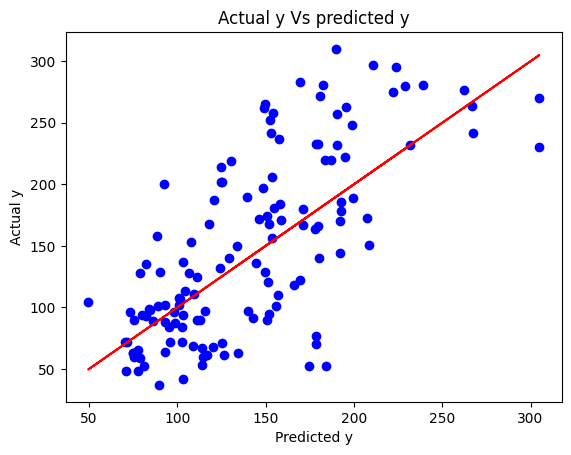

In [9]:
actual_y = y_test
predicted_y = model.predict(X_test)

plt.figure()
plt.scatter(predicted_y, actual_y, c="blue")
plt.plot(predicted_y, predicted_y, c="red")
plt.xlabel("Predicted y")
plt.ylabel("Actual y")
plt.title("Actual y Vs predicted y")
plt.show()

With iris dataset (classification).

In [2]:
iris_dataset = load_iris(as_frame=True)
iris_df = iris_dataset.frame

In [3]:
print(iris_df.info())
display(iris_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# build the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [6]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=30, validation_split=0.1, verbose=0)

In [7]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

1/1 [==============================] - 0s 66ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.56      0.71         9
           2       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.91      0.85      0.85        30
weighted avg       0.90      0.87      0.86        30

Confusion Matrix:
[[10  0  0]
 [ 0  5  4]
 [ 0  0 11]]


With the MNIST dataset of handwritten digits (image classification).

The MNIST dataset is a collection of handwritten digits. It consists of 70000 images (60000 training, 10000 testing). All those images are in grayscale and centered in a 28x28 image frame.

In [2]:
# load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


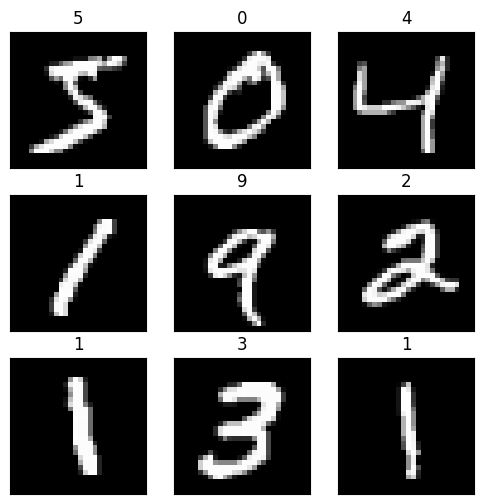

In [3]:
# display some digits in the dataset
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(train_labels[i])
plt.show()

In [4]:
# normalize and convert the labels to class vectors
train_images = train_images / 255
test_images = test_images / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [5]:
# define the CNN architecture
model = tf.keras.models.Sequential()

# convolutional and pooling layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D (64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D (64, (3, 3), activation='relu'))

# fully connected layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [6]:
# compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 37s 39ms/step - loss: 0.1810 - accuracy: 0.9446 - val_loss: 0.0669 - val_accuracy: 0.9797
Epoch 2/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0542 - accuracy: 0.9837 - val_loss: 0.0368 - val_accuracy: 0.9880
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0365 - val_accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0338 - val_accuracy: 0.9895
Epoch 5/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0241 - accuracy: 0.9925 - val_loss: 0.0272 - val_accuracy: 0.9922


In [7]:
# evaluate the model
pred = np.argmax(model.predict(test_images), axis=-1)
true_labels = np.argmax(test_labels, axis=-1)

print(classification_report(true_labels, pred))

313/313 [==============================] - 2s 5ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



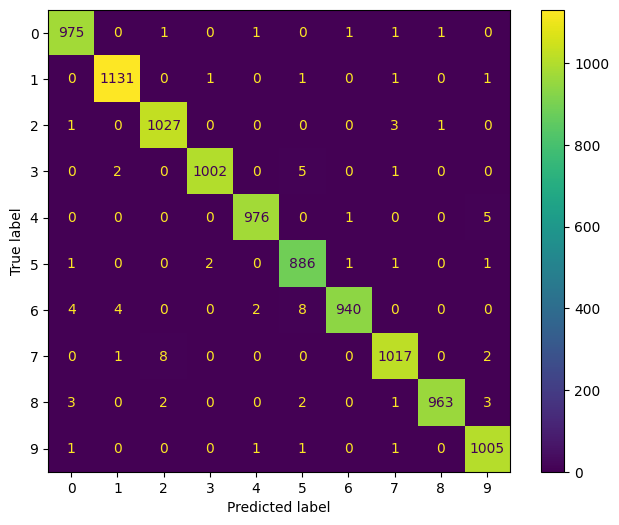

In [8]:
cm = confusion_matrix(true_labels, pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
disp.figure_.set_size_inches(w=8, h=6)